# Regressão Multilinear 

## Sumário

## 0. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 1. Geração do Dataset 

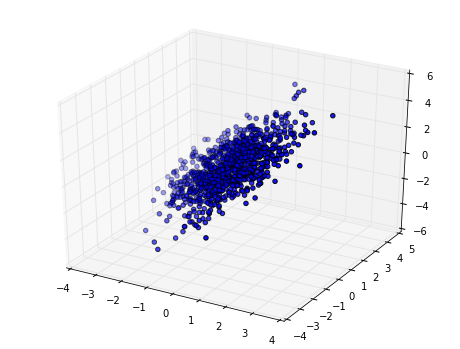

In [52]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = np.random.randn(1000,1)
y = np.random.randn(1000,1)
z = x + y + np.random.rand(1000,1) # acrescenta um erro aleatorio
ax.scatter3D(x, y, z)

## 2. Modelo de Regressão Linear Múltipla

Dada uma amostra com n observações com k preditores:

$$\{(x_{11},x_{12},...,x_{k1}, y_1), (x_{12},x_{22},...,x_{k2}, y_2),...,(x_{1n},x_{1n},...,x_{kn}, y_n)\}$$

O modelo consiste das seguintes n equações:

$$\left\{
  \begin{array}{ll}
    y_1=b_0+b_1x_{11}+b_2x_{21}+...+b_kx_{k1}+e1\\
    y_2=b_0+b_1x_{12}+b_2x_{22}+...+b_kx_{k2}+e1\\
    ...\\
    y_n=b_0+b_1x_{1n}+b_2x_{2n}+...+b_kx_{kn}+e1\\
  \end{array}
\right.
$$

Que pode ser convertido na notação vetorial:

$$
\begin{bmatrix}y_1 \\y_2 \\. \\. \\. \\y_n \end{bmatrix} =
\begin{bmatrix}1 & x_{11} & x_{21} & ... & x_{k1} 
\\1 & x_{12} & x_{22} & ... & x_{k2}  
\\.&.&.&.&. 
\\.&.&.&.&. 
\\.&.&.&.&. 
\\1 & x_{1n} & x_{2n} & ... & x_{kn}
\end{bmatrix}
\begin{bmatrix}b_0 \\b_1 \\. \\. \\. \\b_n \end{bmatrix}
+
\begin{bmatrix}e_1 \\e_2 \\. \\. \\. \\e_n \end{bmatrix}
$$

$$\textbf{Y = Xb + e}$$

Para resolver esse sistema, vamos utilizar o **Método dos mínimos quadrados**.

## 3. Métodos dos Mínimos Quadrados

Estimação dos parâmetros:

$$b = (X^TX)^{-1}(X^TY)$$

## 4. Regressão Multilinear

In [16]:
# junta x e y numa só matriz
xy = np.concatenate((x,y), axis=1)

b1 = np.linalg.inv(np.dot(xy.T,xy)) # primeira parte
b2 = np.dot(xy.T,z) # segunda parte
b = np.dot(b1,b2) # equacao final

print(b)

[[ 1.01982129]
 [ 1.00158868]]


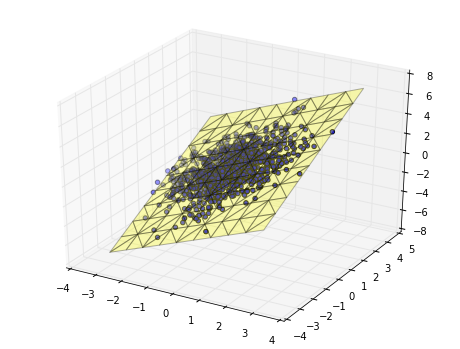

In [53]:
xl = np.linspace(np.min(x), np.max(x), 10)
yl = np.linspace(np.min(y), np.max(y), 10)
xv, yv = np.meshgrid(xl,yl)
xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)

xyv = np.concatenate((xv, yv), axis=1)
z_pred = np.dot(xyv, b)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z)
ax.plot_trisurf(xv.ravel(), yv.ravel(), z_pred.ravel(), alpha=0.3, color='yellow', shade=False)